In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tool.core import data_types

In [19]:
ood_file_path = '/home/vlasova/datasets/0metadata/SummerWinter/ood_score_230424_163953.ood.pkl'
corresponding_meta_file = '/home/vlasova/datasets/0metadata/SummerWinter/SummerWinter.meta.pkl'
ood_df = pd.read_pickle(ood_file_path)
meta_df = pd.read_pickle(corresponding_meta_file)

data_df = pd.merge(meta_df, ood_df[
                  [data_types.RelativePathType.name(), data_types.OoDScoreType.name()]],
                                    on=data_types.RelativePathType.name(), how='inner')

ood_score = data_df[data_types.OoDScoreType.name()].values

In [21]:
data_df.head(5)

,relative_path,labels,test_sample,label,ood_score
0,summer2winter_yosemite/testA/2016-05-12 17_00_...,"[Summer, Winter]",True,Summer,0.516292
1,summer2winter_yosemite/testA/2016-07-03 02_49_...,"[Summer, Winter]",True,Summer,0.408273
2,summer2winter_yosemite/testA/2013-07-29 18_38_...,"[Summer, Winter]",True,Summer,0.396382
3,summer2winter_yosemite/testA/2011-06-03 21_27_...,"[Summer, Winter]",True,Summer,0.224374
4,summer2winter_yosemite/testA/2015-08-03 07_48_...,"[Summer, Winter]",True,Summer,0.302081


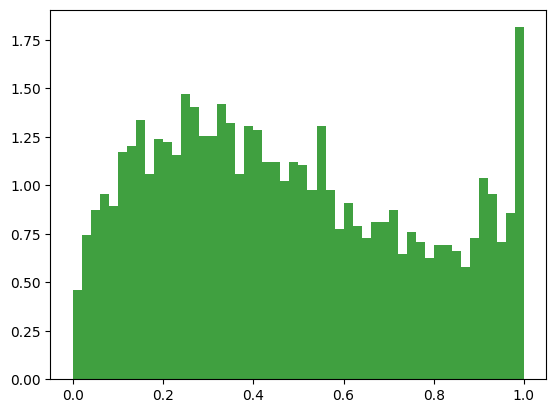

In [14]:
n, bins, patches = plt.hist(
    ood_score, 50, density=1, facecolor="green", alpha=0.75
)

In [24]:
def get_hist(data_df, label):
    df = data_df[data_df[data_types.LabelType.name()] == label]
    ood_score = df[data_types.OoDScoreType.name()].values
    n, bins, patches = plt.hist(ood_score, 50, density=1, facecolor="green", alpha=0.75)

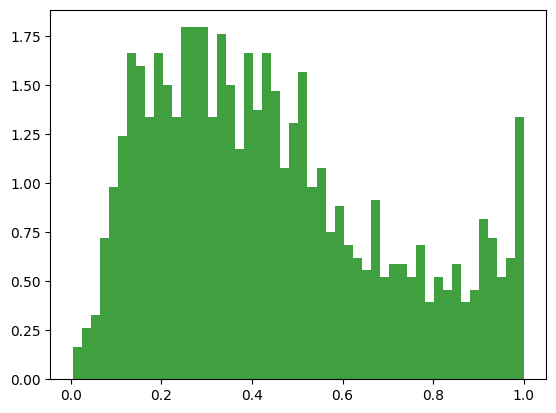

In [25]:
get_hist(data_df, 'Summer')

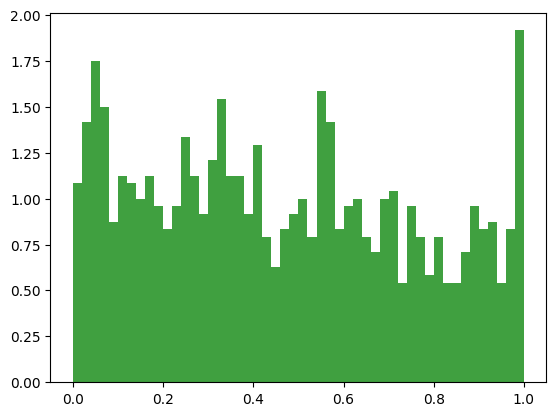

In [26]:
get_hist(data_df, 'Winter')

In [49]:
def get_samples_with_ood_above(input_df, threshold: int, label=''):
    local_df = input_df.copy()
    if label != '':
        local_df = local_df[data_df[data_types.LabelType.name()] == label]
    local_df.sort_values(by=[data_types.OoDScoreType.name()], inplace=True, ascending=False)
    local_df = local_df[local_df[data_types.OoDScoreType.name()] > threshold]
    return local_df

In [50]:
get_samples_with_ood_above(data_df, 0.95, 'Winter')

,relative_path,labels,test_sample,label,ood_score
2464,summer2winter_yosemite/trainB/2013-12-25 16_45...,"[Summer, Winter]",False,Winter,0.999996
1999,summer2winter_yosemite/trainB/2010-02-17 21_19...,"[Summer, Winter]",False,Winter,0.999948
2170,summer2winter_yosemite/trainB/2016-02-05 17_35...,"[Summer, Winter]",False,Winter,0.999842
2547,summer2winter_yosemite/trainB/2012-08-26 18_37...,"[Summer, Winter]",False,Winter,0.999819
1916,summer2winter_yosemite/trainB/2012-01-13 13_12...,"[Summer, Winter]",False,Winter,0.999776
...,...,...,...,...,...
2457,summer2winter_yosemite/trainB/2016-02-03 17_20...,"[Summer, Winter]",False,Winter,0.955416
2164,summer2winter_yosemite/trainB/2009-02-20 16_02...,"[Summer, Winter]",False,Winter,0.954288
1896,summer2winter_yosemite/trainB/2016-09-30 20_39...,"[Summer, Winter]",False,Winter,0.952767
2495,summer2winter_yosemite/trainB/2011-04-02 13_06...,"[Summer, Winter]",False,Winter,0.952716


In [37]:
def convert_to_csv_format(data_df):
    # target1,target2,filename,local_path,subset
    # car_tl_x001x_forward,straight,exp.005.066.left.000030_x260_y215_h41_w20.png,
    # /home/ashkanaev/data/tf_new_one_2/car_tl_x001x_forward/exp.005.066.left.000030_x260_y215_h41_w20.png,train

    def get_filename(rel_path):
        _, name = os.path.split(rel_path)
        return name

    def get_second_target_from_path(rel_path):
        p, _ = os.path.split(rel_path)
        p = p.lower()
        if "rotated" in p:
            return "rotated"
        if "straight" in p:
            return "straight"
        return "unknown"


    csv_df = pd.DataFrame()
    csv_df["target1"] = data_df[data_types.LabelType.name()]
    csv_df["target2"] = data_df[data_types.RelativePathType.name()].apply(lambda relative_path: get_second_target_from_path(relative_path))
    csv_df["filename"] = data_df[data_types.RelativePathType.name()].apply(lambda relative_path: get_filename(relative_path))
    csv_df["local_path"] = data_df[data_types.RelativePathType.name()]
    csv_df["subset"] = ''
    return csv_df

In [39]:
csv_df = convert_to_csv_format(data_df)
csv_df.head(5)

,target1,target2,filename,local_path,subset
0,Summer,unknown,2016-05-12 17_00_00.jpg,summer2winter_yosemite/testA/2016-05-12 17_00_...,
1,Summer,unknown,2016-07-03 02_49_41.jpg,summer2winter_yosemite/testA/2016-07-03 02_49_...,
2,Summer,unknown,2013-07-29 18_38_51.jpg,summer2winter_yosemite/testA/2013-07-29 18_38_...,
3,Summer,unknown,2011-06-03 21_27_20.jpg,summer2winter_yosemite/testA/2011-06-03 21_27_...,
4,Summer,unknown,2015-08-03 07_48_51.jpg,summer2winter_yosemite/testA/2015-08-03 07_48_...,


In [40]:
csv_df.to_csv('ood_dataset.csv')  

In [4]:
import numpy as np

In [5]:
x = np.arange(0, 1.0, 0.01, dtype=float)

In [18]:
y = [x**2, np.exp(x)]

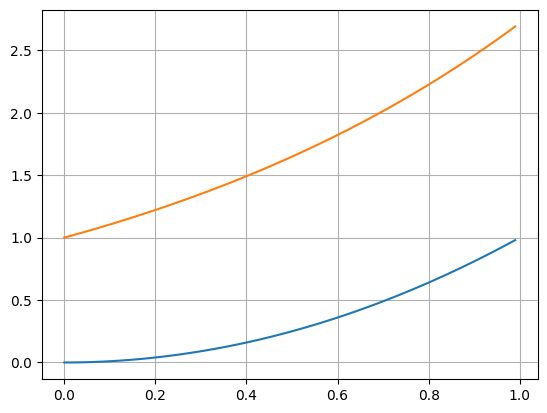

In [19]:
for v in y:
    plt.plot(x, v)
    
plt.grid(True)

In [20]:
np.exp(x)

array([1.        , 1.01005017, 1.02020134, 1.03045453, 1.04081077,
       1.0512711 , 1.06183655, 1.07250818, 1.08328707, 1.09417428,
       1.10517092, 1.11627807, 1.12749685, 1.13882838, 1.1502738 ,
       1.16183424, 1.17351087, 1.18530485, 1.19721736, 1.2092496 ,
       1.22140276, 1.23367806, 1.24607673, 1.25860001, 1.27124915,
       1.28402542, 1.29693009, 1.30996445, 1.32312981, 1.33642749,
       1.34985881, 1.36342511, 1.37712776, 1.39096813, 1.40494759,
       1.41906755, 1.43332941, 1.44773461, 1.46228459, 1.47698079,
       1.4918247 , 1.50681779, 1.52196156, 1.53725752, 1.55270722,
       1.56831219, 1.58407398, 1.59999419, 1.6160744 , 1.63231622,
       1.64872127, 1.66529119, 1.68202765, 1.69893231, 1.71600686,
       1.73325302, 1.7506725 , 1.76826705, 1.78603843, 1.80398842,
       1.8221188 , 1.8404314 , 1.85892804, 1.87761058, 1.89648088,
       1.91554083, 1.93479233, 1.95423732, 1.97387773, 1.99371553,
       2.01375271, 2.03399126, 2.05443321, 2.07508061, 2.09593